In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from time import time
import sompy
%matplotlib inline

In [2]:
file_shp = r'D:\Projects\RO\Jong HKV\Toeleveringen\DominikPaprotny\ExtremeDischargesEUCatchments\Stations_total_v3.shp'
file_csv = r'D:\Projects\RO\Jong HKV\Toeleveringen\DominikPaprotny\ExtremeDischargesEUCatchments\BN_data_full.csv'

In [3]:
# read and parse data
df = pd.read_csv(file_csv,sep=';', decimal=',')
df.replace(np.inf, 0, inplace=True)
df.replace(np.nan, 0, inplace=True)

# exclude some columns
df = df[df.columns.difference(['OBJECTID', 'Station_ID','WSO1_ID','Catchment_ID','Indicator_of_daily_discharge_availability'])]
df = df.astype(np.float32)

In [22]:
df.shape

(74756, 35)

In [4]:
# standardize matrix
X = df.as_matrix()
_mu = np.nanmean(X, axis=0)
_sigma = np.sqrt(np.nanmean((X - _mu) ** 2.0, axis=0))
X = (X - _mu) / _sigma

In [5]:
# go back to pandas dataframe and drop NaN columns
df = pd.DataFrame(data=X, columns=df.columns)
df.dropna(axis=1, how='all', inplace=True)
X = df.as_matrix()

In [6]:
#df.plot(subplots=True,figsize=(12,35))

In [7]:
# train a kohonen network
mapsize = [20,20]
som = sompy.SOMFactory.build(X, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch',component_names=df.columns, name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
 pca_linear_initialization took: 0.139000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 1



maxtrainlen %d inf


 epoch: 1 ---> elapsed time:  0.579000, quantization error: 4.093862

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 1



maxtrainlen %d inf


 epoch: 1 ---> elapsed time:  0.794000, quantization error: 3.738607

 Final quantization error: 3.738607
 train took: 1.539000 seconds


In [8]:
topographic_error = som.calculate_topographic_error()
quantization_error = np.mean(som._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.13580180855; Quantization error = 3.7386065373


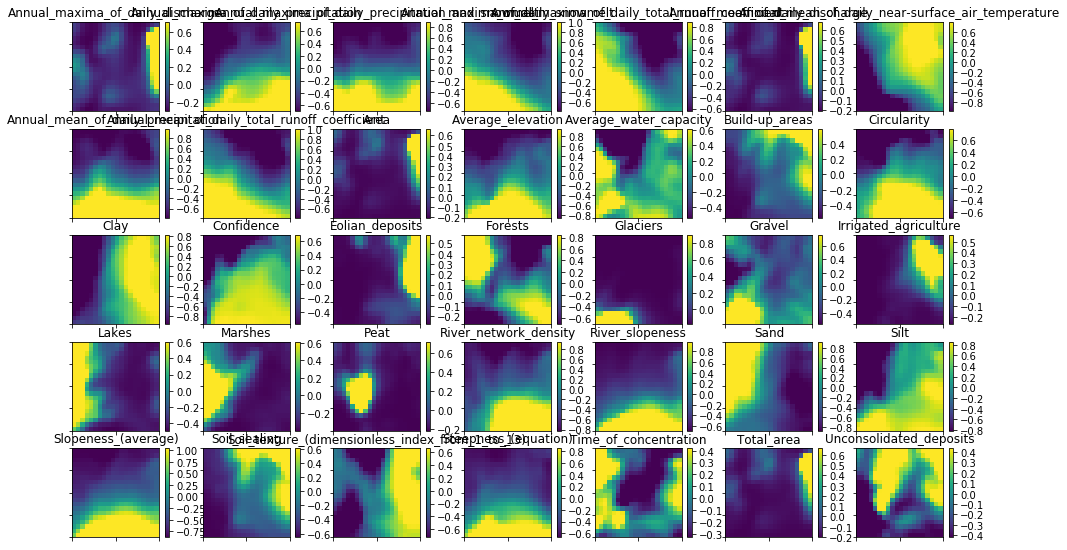

In [23]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(som, col_sz=7, which_dim="all", desnormalize=True)

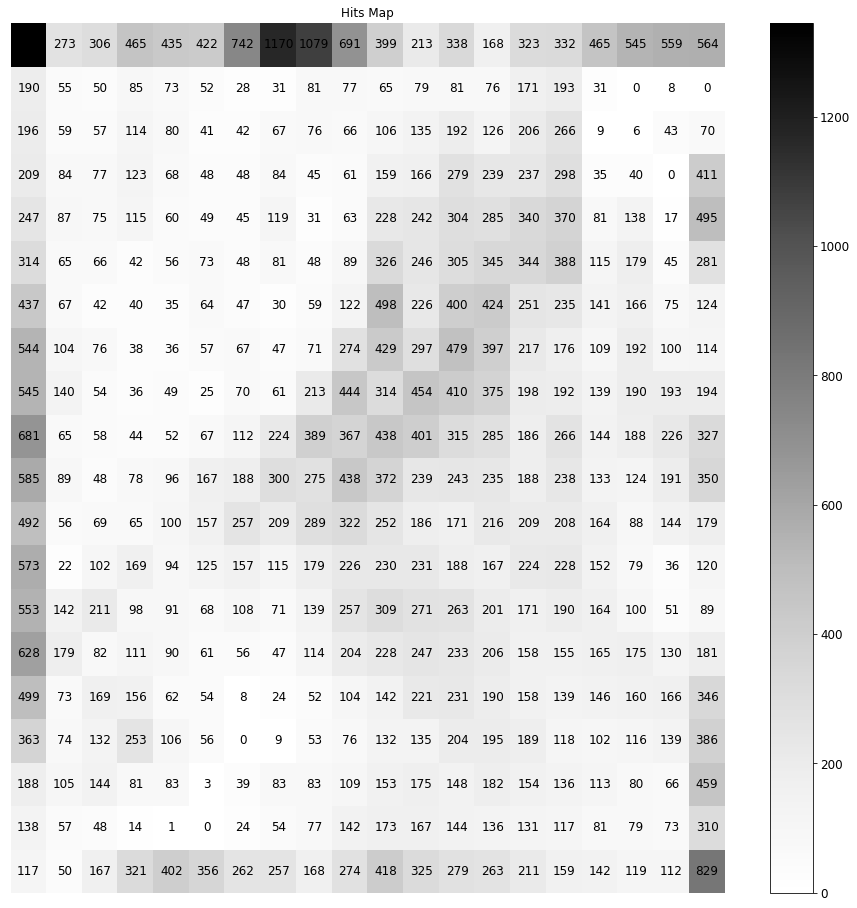

In [10]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(4,4,"Hits Map",text_size=12)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

In [11]:
# from sompy.visualization.hitmap import HitMapView
# som.cluster(4)
# hits  = HitMapView(20,20,"Clustering",text_size=12)
# a=hits.show(som)

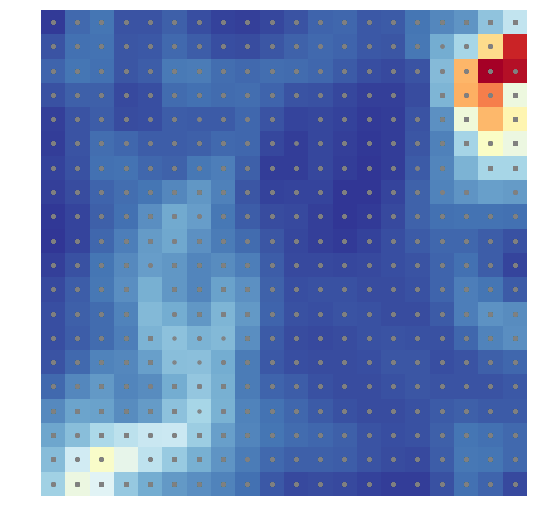

In [12]:
#But Umatrix finds the clusters easily
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

# #This is the Umat value
UMAT = u.build_u_matrix(som, distance=1, row_normalized=False)
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=False, blob=False)

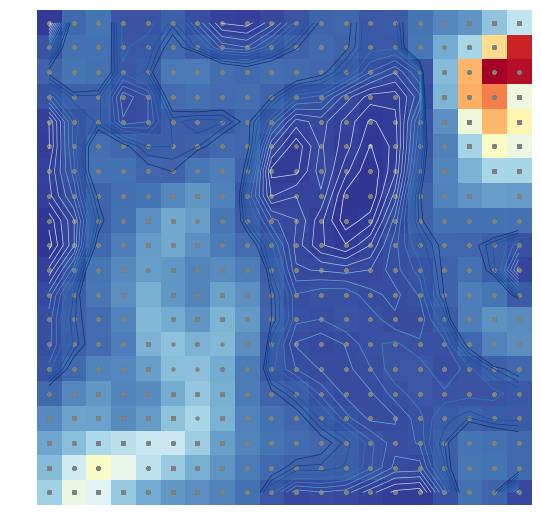

In [24]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)